# Problem 1

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("diabetes.csv")

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'diabetes.csv')
x = df.values[:, :7]
y = df.values[:, 8]

sc0 = MinMaxScaler()
x = sc0.fit_transform(x)

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=np.random)

In [32]:
x[0:10]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792],
       [0.29411765, 0.58291457, 0.60655738, 0.        , 0.        ,
        0.38152012, 0.05251921],
       [0.17647059, 0.3919598 , 0.40983607, 0.32323232, 0.10401891,
        0.46199702, 0.07258753],
       [0.58823529, 0.57788945, 0.        , 0.        , 0.        ,
        0.52608048, 0.02391119],
       [0.11764706, 0.98994975, 0.57377049, 0.45454545, 0.64184397,
        0.45454545, 0.03415884],
       [0.47058824, 0.6281407 , 0.78688525, 0.        , 0.        ,
        0.        , 0.0

In [20]:
x_test.shape

(154, 7)

In [22]:
y_train.shape

(614,)

In [33]:
y_test.shape

(154,)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lreg = LogisticRegression()
lreg.fit(x_train, y_train)
pred = lreg.predict(x_test)
cMat = confusion_matrix(y_test, pred)
print(cMat)

[[100   7]
 [ 19  28]]


In [42]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,pred))
print("Precision:",metrics.precision_score(y_test,pred))
print("Recall:",metrics.recall_score(y_test,pred))

Accuracy: 0.8311688311688312
Precision: 0.8
Recall: 0.5957446808510638


Text(0.5, 15.0, 'Predicted label')

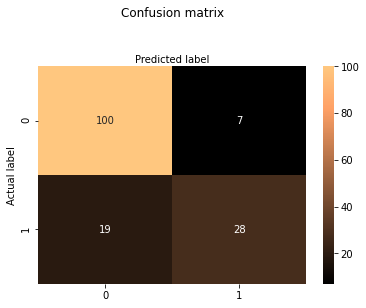

In [99]:
import seaborn as sns

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cMat), annot = True, cmap = 'copper', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix',y = 1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Problem 2

In [86]:
from sklearn.naive_bayes import GaussianNB

gUs = GaussianNB()
gUs.fit(x_train,y_train)
pred = gUs.predict(x_test)
cnf_matrix = confusion_matrix(y_test, pred)
print(cnf_matrix)

[[94 13]
 [19 28]]


In [90]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, pred))
print('Precision:', metrics.precision_score(y_test, pred))
print('Recall:', metrics.recall_score(y_test, pred))

Accuracy: 0.7922077922077922
Precision: 0.6829268292682927
Recall: 0.5957446808510638


In [1]:
import seaborn as sns

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cMat), annot = True, cmap = 'copper', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix',y = 1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax=ax

NameError: name 'plt' is not defined

# Problem 3

In [104]:
from sklearn.model_selection import KFold

x_kfold = x
y_kfold = y
kf = KFold(n_splits=5)
kf.get_n_splits(x)

5

In [106]:
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [108]:
print('Accuracy:', scores['test_accuracy'])
print('Precision:', scores['test_precision'])
print('Recall:', scores['test_recall'])

Accuracy: [0.77922078 0.77922078 0.80519481 0.7012987  0.81818182 0.71428571
 0.85714286 0.75324675 0.75       0.75      ]
Precision: [0.8        0.8        0.82608696 0.53333333 0.89473684 0.55555556
 0.8        0.72222222 0.70588235 0.78947368]
Recall: [0.55172414 0.46153846 0.63333333 0.33333333 0.5862069  0.41666667
 0.69565217 0.48148148 0.46153846 0.5       ]


In [121]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x_kfold[train_index], x_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

In [2]:
x_train.shape

NameError: name 'x_train' is not defined

# Problem 4

In [127]:
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [128]:
pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [134]:
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred))
print("Precision:",metrics.precision_score(y_test,pred))
print("Recall:",metrics.recall_score(y_test,pred))

Accuracy: 0.7581699346405228
Precision: 0.7428571428571429
Recall: 0.48148148148148145


In [144]:
cnf_matrix = confusion_matrix(y_test, pred)
print(cnf_matrix)

[[90  9]
 [28 26]]


In [151]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from numpy import mean

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score),
'precision' : make_scorer(precision_score),
'recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
print("Accuracy:",mean(final_scores['test_accuracy']))

Accuracy: 0.7655673274094327


In [153]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score),

                    'precision' : make_scorer(precision_score),
                    'recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
print("Accuracy:",mean(final_scores['test_accuracy']))
print("Precision:",mean(final_scores['test_precision']))
print("Recall:",mean(final_scores['test_recall']))

Accuracy: 0.7655673274094327
Precision: 0.6863522347218
Recall: 0.5936918506558686
